In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV in pandas
data = ("/Users/chac/Desktop/Class/Project_4/amazon_product_reviews_ML/Resources/cleaned_data.csv")
df = pd.read_csv(data)

# Display DataFrame
df.head()

,Unnamed: 0,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery
0,0,B0D12T4WZT,USB C Charger for iPhone 14 13 12 11 Charger [...,9,USD,5.0,59,1,$9.99,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
1,1,B0D2X7Y7VF,USB C to Lightning Cable [Apple MFi Certified]...,7,USD,4.5,318,1,$7.49,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
2,2,B0CZPHPJLN,Beats Solo 4 - Wireless Bluetooth On-Ear Headp...,149,USD,4.1,92,1,$149.95,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 Or fastest delivery ..."
3,3,B0D49CWPH2,"USB C to USB C Cable, (5Pack 6FT), New Nylon U...",29,USD,4.9,94,1,$29.66,False,False,True,False,10K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
4,4,B0D14HHDGJ,iPhone 15 Charger 5Pack (6/6/6/6/6 ft) USB C t...,15,USD,4.8,80,1,$15.99,False,False,True,False,500+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."


In [3]:
# Determine column names
df.columns

Index(['Unnamed: 0', 'asin', 'product_title', 'product_price', 'currency',
       'product_star_rating', 'product_num_ratings', 'product_num_offers',
       'product_minimum_offer_price', 'is_best_seller', 'is_amazon_choice',
       'is_prime', 'climate_pledge_friendly', 'sales_volume', 'delivery'],
      dtype='object')

In [4]:
# Define a function to convert text to numeric
def text_to_numeric(text):
    if "K" in text:
        return int(float(text.replace("K", "").replace("+ bought in past month", "")) * 1000)
    else:
        return int(text.replace("+ bought in past month", ""))

# Convert sales_volume column to numeric
df["sales_volume_numeric"] = df["sales_volume"].apply(text_to_numeric)

# Display results
df.head()

,Unnamed: 0,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,sales_volume_numeric
0,0,B0D12T4WZT,USB C Charger for iPhone 14 13 12 11 Charger [...,9,USD,5.0,59,1,$9.99,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",4000
1,1,B0D2X7Y7VF,USB C to Lightning Cable [Apple MFi Certified]...,7,USD,4.5,318,1,$7.49,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",4000
2,2,B0CZPHPJLN,Beats Solo 4 - Wireless Bluetooth On-Ear Headp...,149,USD,4.1,92,1,$149.95,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 Or fastest delivery ...",4000
3,3,B0D49CWPH2,"USB C to USB C Cable, (5Pack 6FT), New Nylon U...",29,USD,4.9,94,1,$29.66,False,False,True,False,10K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",10000
4,4,B0D14HHDGJ,iPhone 15 Charger 5Pack (6/6/6/6/6 ft) USB C t...,15,USD,4.8,80,1,$15.99,False,False,True,False,500+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",500


In [5]:
# Check to see column was created successfully vs the original 
print(df[["sales_volume", "sales_volume_numeric"]])

                  sales_volume  sales_volume_numeric
0     4K+ bought in past month                  4000
1     4K+ bought in past month                  4000
2     4K+ bought in past month                  4000
3    10K+ bought in past month                 10000
4    500+ bought in past month                   500
..                         ...                   ...
360                          0                     0
361  300+ bought in past month                   300
362                          0                     0
363                          0                     0
364                          0                     0

[365 rows x 2 columns]


In [6]:
# Sort the DataFrame by sales_volume_numeric column
df_sorted = df.sort_values(by="sales_volume_numeric", ascending=False)

# Display the sorted DataFrame
df_sorted.head()

,Unnamed: 0,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery,sales_volume_numeric
10,10,B099VMT8VZ,Meta Quest 2 — Advanced All-In-One Virtual Rea...,199,USD,4.7,73340,1,$199.00,True,False,False,False,20K+ bought in past month,FREE delivery Jun 18 - 24 Or fastest delivery ...,20000
26,26,B0CN6GHGD6,iPhone Charger Fast Charging【MFi Certified】 2P...,8,USD,4.6,1585,1,$8.95,False,False,True,False,10K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",10000
292,292,B08HV3MPFD,"Phomemo D30 Label Maker Machine, Portable Blue...",19,USD,4.3,18341,1,$19.99,True,False,True,False,10K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",10000
63,63,B098VYV9WP,SUPRUS Electric Lighter Arc Windproof Flameles...,7,USD,4.5,2661,1,$7.99,True,False,True,False,10K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",10000
298,298,B08HV3MPFD,"Phomemo D30 Label Maker Machine, Portable Blue...",19,USD,4.3,18341,1,$19.99,True,False,True,False,10K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship...",10000


In [34]:
# Create a new column 'total_revenue' by multiplying 'product_price' with 'sales_volume_numeric'
df_sorted["total_revenue"] = df_sorted["product_price"] * df_sorted["sales_volume_numeric"]

# Display the updated DataFrame
df_sorted[["product_title", "product_price", "sales_volume_numeric", "total_revenue", "is_best_seller"]].head()

,product_title,product_price,sales_volume_numeric,total_revenue,is_best_seller
10,Meta Quest 2 — Advanced All-In-One Virtual Rea...,199,20000,3980000,True
26,iPhone Charger Fast Charging【MFi Certified】 2P...,8,10000,80000,False
292,"Phomemo D30 Label Maker Machine, Portable Blue...",19,10000,190000,True
63,SUPRUS Electric Lighter Arc Windproof Flameles...,7,10000,70000,True
298,"Phomemo D30 Label Maker Machine, Portable Blue...",19,10000,190000,True


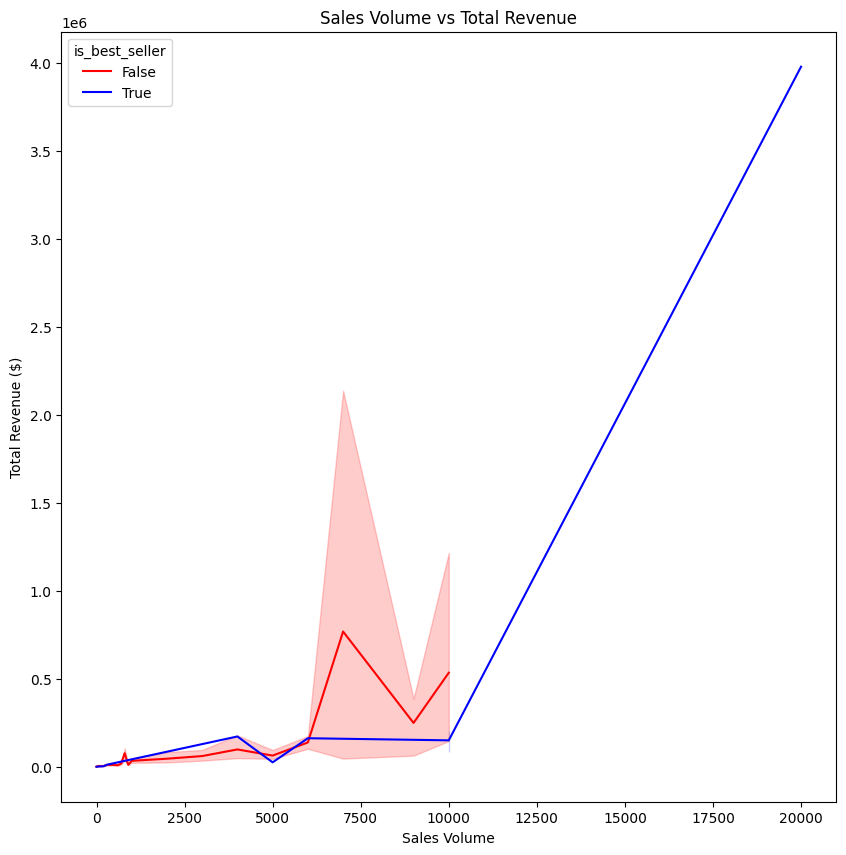

In [30]:
# Create subplots
fig, ax = plt.subplots(figsize=(10, 10))

# Define a custom palette based on a boolean column
palette = {True: "blue", False: "red"}

# Plotting
sns.lineplot(x="sales_volume_numeric", y="total_revenue", hue="is_best_seller", data=df_sorted, palette=palette, ax=ax)
ax.set_xlabel("Sales Volume")
ax.set_ylabel("Total Revenue ($)")
ax.set_title("Sales Volume vs Total Revenue")

# Display the plot
plt.show()


Upon analyzing the Total Revenue versus Sales Volume, it becomes evident that bestselling items outsell non-bestselling items by nearly twice the quantity and contribute approximately 53% more to the Total Revenue.

<Figure size 1000x800 with 0 Axes>

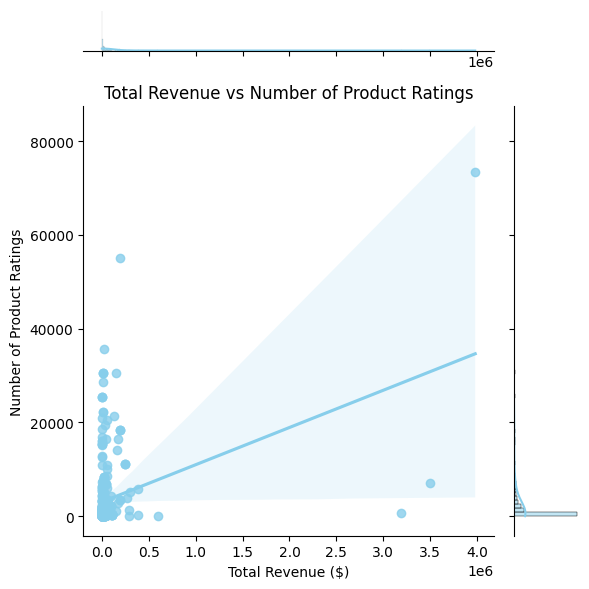

In [35]:
# Plotting
plt.figure(figsize = (10, 8))
sns.jointplot(x = "total_revenue", y = "product_num_ratings", data = df_sorted, kind = "reg", color = "skyblue")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Number of Product Ratings")
plt.title("Total Revenue vs Number of Product Ratings")

plt.tight_layout()

# Display the plot
plt.show()

After evaluating the relationship between Total Revenue and Number of Product Ratings, it is evident that the quantity of ratings does not directly correlate with Total Revenue.

# Analysis